# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [1]:

import numpy as np                                                 
import pandas as pd                                                
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet

# Carga de datos

In [2]:
dataframe = pd.read_csv("aguacates_EEUU.csv")

# Explorar el conjunto de datos  

In [3]:
dataframe.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
dataframe.tail()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
dataframe.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Asegurar que estén los datos en orden cronológico

In [3]:
dataframe.Date = pd.to_datetime(dataframe.Date, dayfirst=True)

In [4]:
dataframe = dataframe.sort_values('Date').reset_index(drop=True)


In [10]:
dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
18247,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

Tras analizar ambas graficas se puede observar que la tendencia a nivel nacional es que los precios suban desde el mes de mayo hasta mediados de octubre, luego de esto que los precios bajen en el resto de octubre hasta aproximadamente enero. Por otro lado se puede observar que desde el 2015 el precio del arroz a ido en incremento.

Text(0.5, 1.0, 'Average Price')

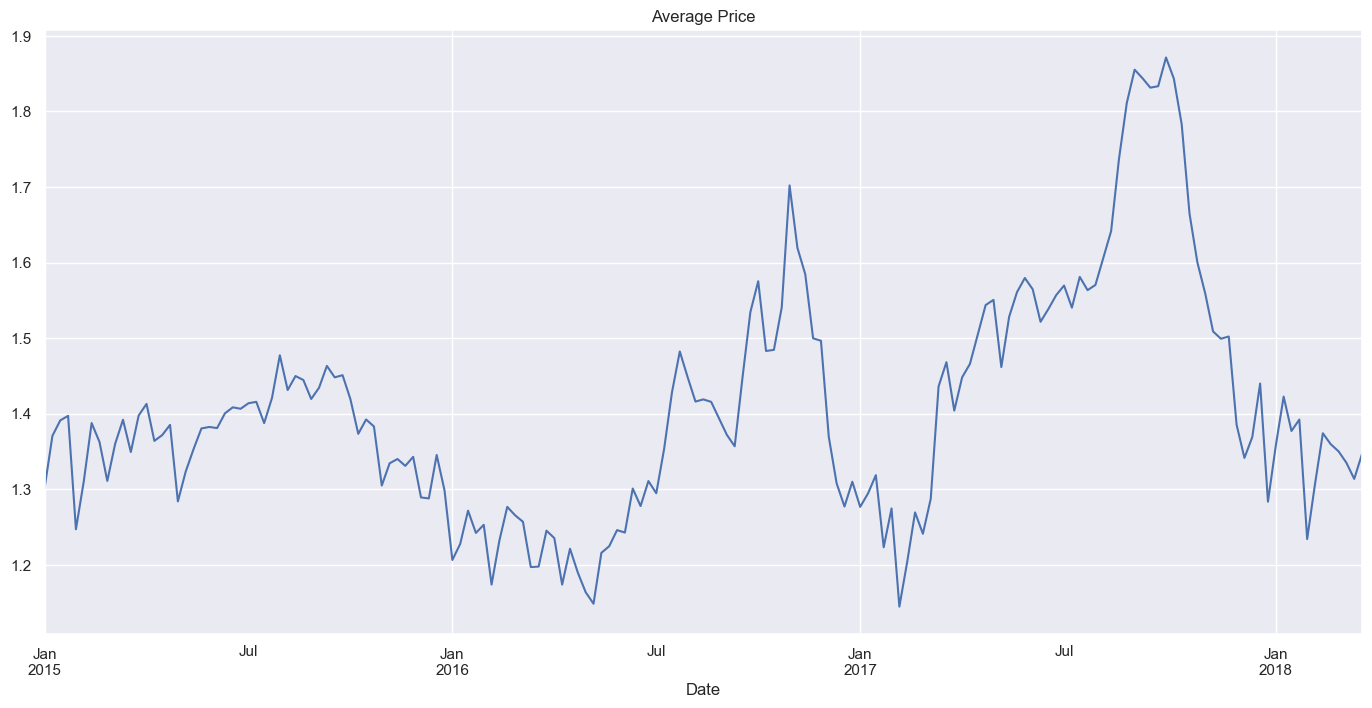

In [5]:
precios_promedio_por_fecha=dataframe.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
precios_promedio_por_fecha['AveragePrice'].plot()
plt.title('Average Price')

In [6]:
dataframe['Month']=dataframe['Date'].apply(lambda x:x.month)


Text(0.5, 1.0, 'Average Price Per Month')

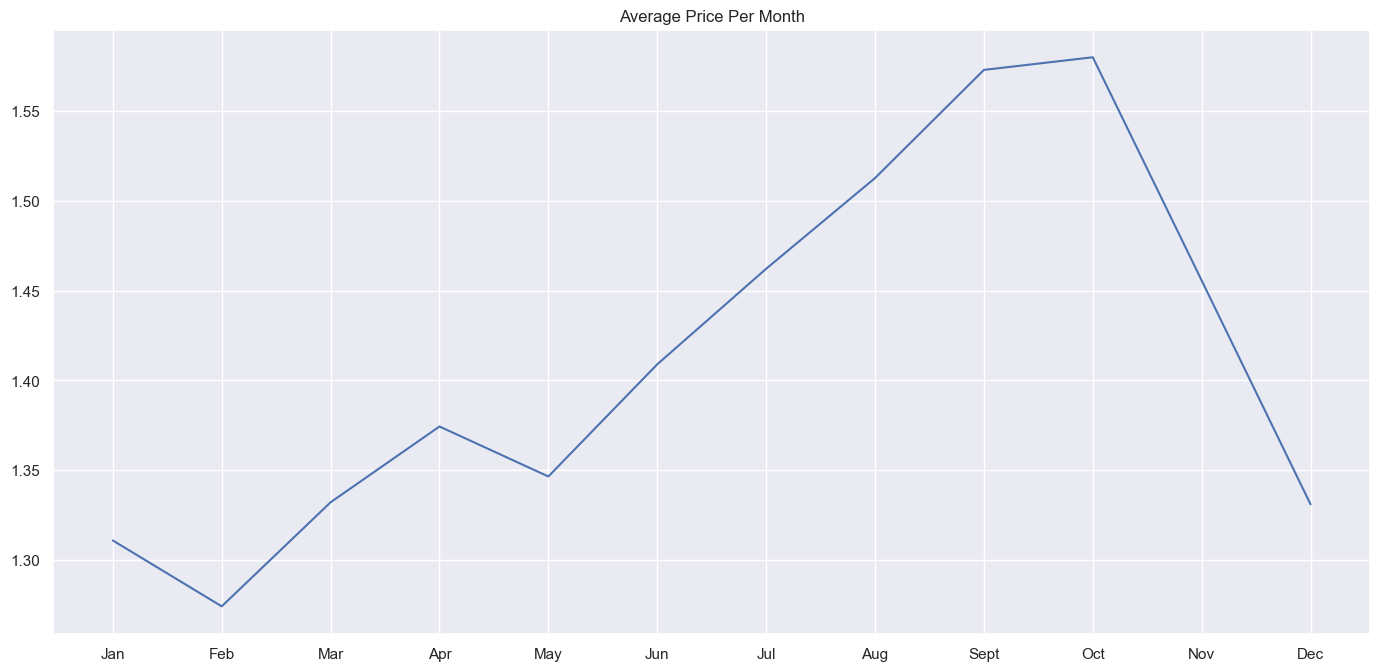

In [7]:
precios_promedio_por_mes = dataframe.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],precios_promedio_por_mes['AveragePrice'])
plt.title('Average Price Per Month')

# Realizar una gráfica de barras para ver el número de regiones

Text(0, 0.5, 'Average Price')

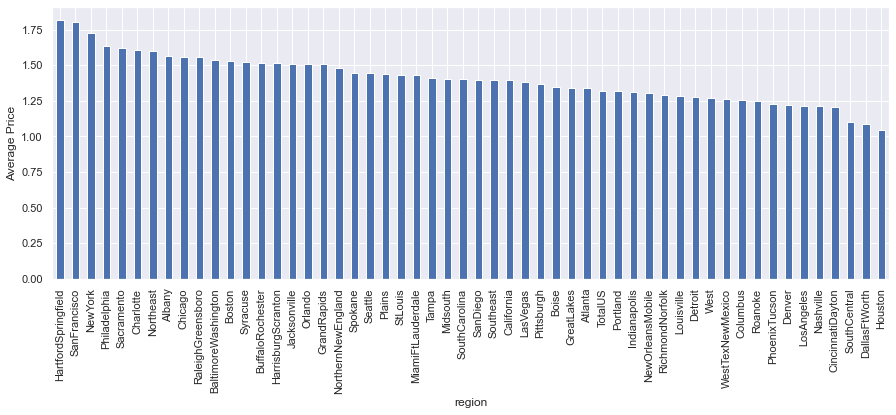

In [8]:
dataframe.groupby("region")["AveragePrice"].mean().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.ylabel('Average Price')


# Realizar una gráfica de barras para ver de qué años se tiene información

<AxesSubplot:xlabel='year'>

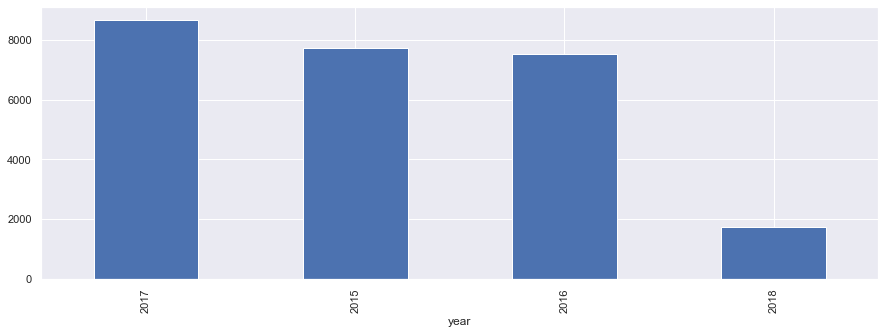

In [9]:
dataframe.groupby("year")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))


# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

Se preparan las variables categoricas

In [10]:
dataframe['region'] = pd.Categorical(dataframe['region'])
dfDummies_region = pd.get_dummies(dataframe['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18245,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18246,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18247,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataframe = pd.concat([dataframe, dfDummies_region], axis=1)
dataframe.drop(columns="region",inplace=True)
dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,...,0,0,1,0,0,0,0,0,0,0
1,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,...,0,0,0,0,0,0,0,0,0,0
2,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,...,0,0,0,0,0,0,0,0,0,0
3,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,...,0,0,0,0,0,0,0,0,0,0
4,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,...,0,0,0,0,0,0,0,0,0,0
18245,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,...,0,1,0,0,0,0,0,0,0,0
18246,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,...,0,1,0,0,0,0,0,0,0,0
18247,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn import preprocessing 

encoder = preprocessing.LabelEncoder() 
dataframe['type']= encoder.fit_transform(dataframe['type']) 
dataframe

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,...,0,0,1,0,0,0,0,0,0,0
1,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,...,0,0,0,0,0,0,0,0,0,0
2,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,...,0,0,0,0,0,0,0,0,0,0
3,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,...,0,0,0,0,0,0,0,0,0,0
4,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,...,0,0,0,0,0,0,0,0,0,0
18245,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,...,0,1,0,0,0,0,0,0,0,0
18246,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,...,0,1,0,0,0,0,0,0,0,0
18247,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,...,0,0,0,0,0,0,0,0,0,0


# Realizar predicciones

In [16]:
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,...,0,0,1,0,0,0,0,0,0,0
1,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,...,0,0,0,0,0,0,0,0,0,0
2,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,...,0,0,0,0,0,0,0,0,0,0
3,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,...,0,0,0,0,0,0,0,0,0,0
4,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,...,0,0,0,0,0,0,0,0,0,0


In [17]:
model = dataframe[['Date', 'AveragePrice']] 
model

,Date,AveragePrice
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64
...,...,...
18244,2018-03-25,1.36
18245,2018-03-25,0.70
18246,2018-03-25,1.42
18247,2018-03-25,1.70


In [19]:
model = model.rename(columns={'Date':'ds', 'AveragePrice':'y'})
model

,ds,y
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64
...,...,...
18244,2018-03-25,1.36
18245,2018-03-25,0.70
18246,2018-03-25,1.42
18247,2018-03-25,1.70


# Creación y ajuste del modelo

In [20]:
m = Prophet()
m.fit(model)

23:33:36 - cmdstanpy - INFO - Chain [1] start processing
23:33:46 - cmdstanpy - INFO - Chain [1] done processing


# Pronosticar hacia el futuro un año (365 días)

In [21]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499563,0.902932,1.883780,1.499563,1.499563,-0.117499,-0.117499,-0.117499,-0.117499,-0.117499,-0.117499,0.0,0.0,0.0,1.382064
1,2015-01-11,1.494268,0.902508,1.858487,1.494268,1.494268,-0.108832,-0.108832,-0.108832,-0.108832,-0.108832,-0.108832,0.0,0.0,0.0,1.385437
2,2015-01-18,1.488974,0.892441,1.890759,1.488974,1.488974,-0.108260,-0.108260,-0.108260,-0.108260,-0.108260,-0.108260,0.0,0.0,0.0,1.380714
3,2015-01-25,1.483679,0.893872,1.827798,1.483679,1.483679,-0.126905,-0.126905,-0.126905,-0.126905,-0.126905,-0.126905,0.0,0.0,0.0,1.356774
4,2015-02-01,1.478385,0.839935,1.784710,1.478385,1.478385,-0.154827,-0.154827,-0.154827,-0.154827,-0.154827,-0.154827,0.0,0.0,0.0,1.323558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164674,0.563977,1.638165,0.977804,1.377203,-0.085570,-0.085570,-0.085570,-0.085570,-0.085570,-0.085570,0.0,0.0,0.0,1.079104
530,2019-03-22,1.163944,0.572603,1.655643,0.975918,1.377198,-0.083773,-0.083773,-0.083773,-0.083773,-0.083773,-0.083773,0.0,0.0,0.0,1.080170
531,2019-03-23,1.163213,0.577978,1.610180,0.973952,1.377188,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,-0.081697,0.0,0.0,0.0,1.081515
532,2019-03-24,1.162482,0.597927,1.570767,0.972451,1.377178,-0.079362,-0.079362,-0.079362,-0.079362,-0.079362,-0.079362,0.0,0.0,0.0,1.083119


# Graficar los datos históricos y los del futuro

Text(0.5, 0.98, 'Forecast of Avocado Prices in the US')

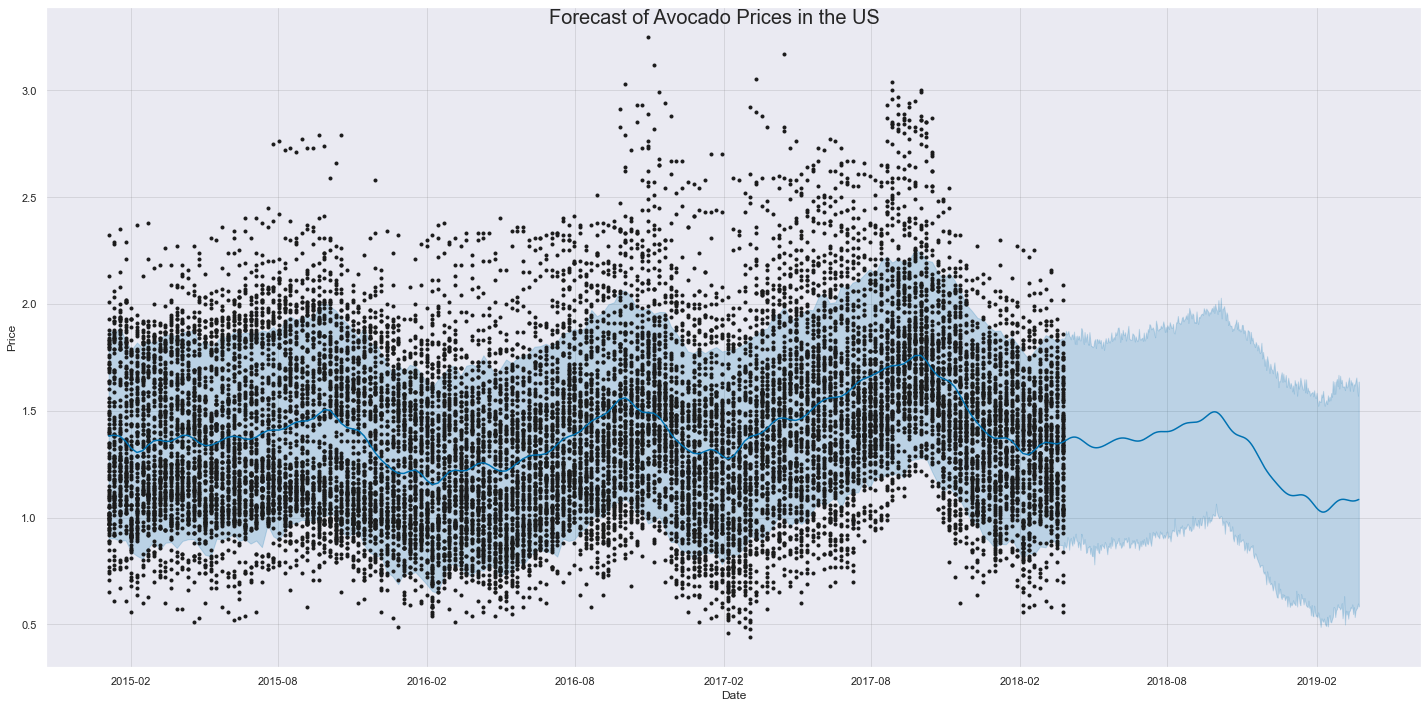

In [22]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price', figsize=(20,10))
figure.suptitle('Forecast of Avocado Prices in the US', fontsize=20)

# Graficar los componentes del pronóstico

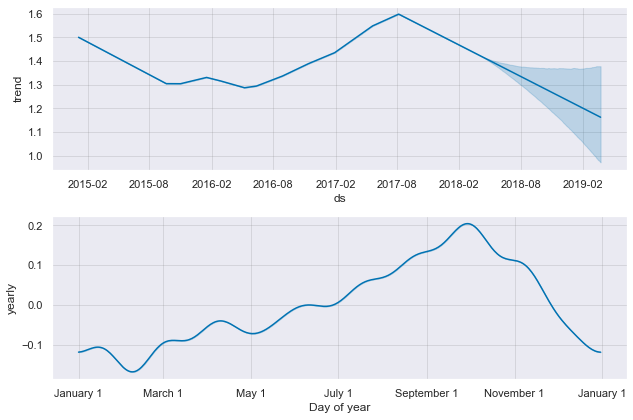

In [23]:
figure2 = m.plot_components(forecast)

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [24]:
dataframe = pd.read_csv("aguacates_EEUU.csv")

In [25]:
west = dataframe[dataframe['region']=='West']

In [26]:
west

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


### Por si acaso no están ordenadas las observaciones

In [27]:
west = west.sort_values("Date")

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

Text(0.5, 1.0, 'Average Price of Avocados in the West')

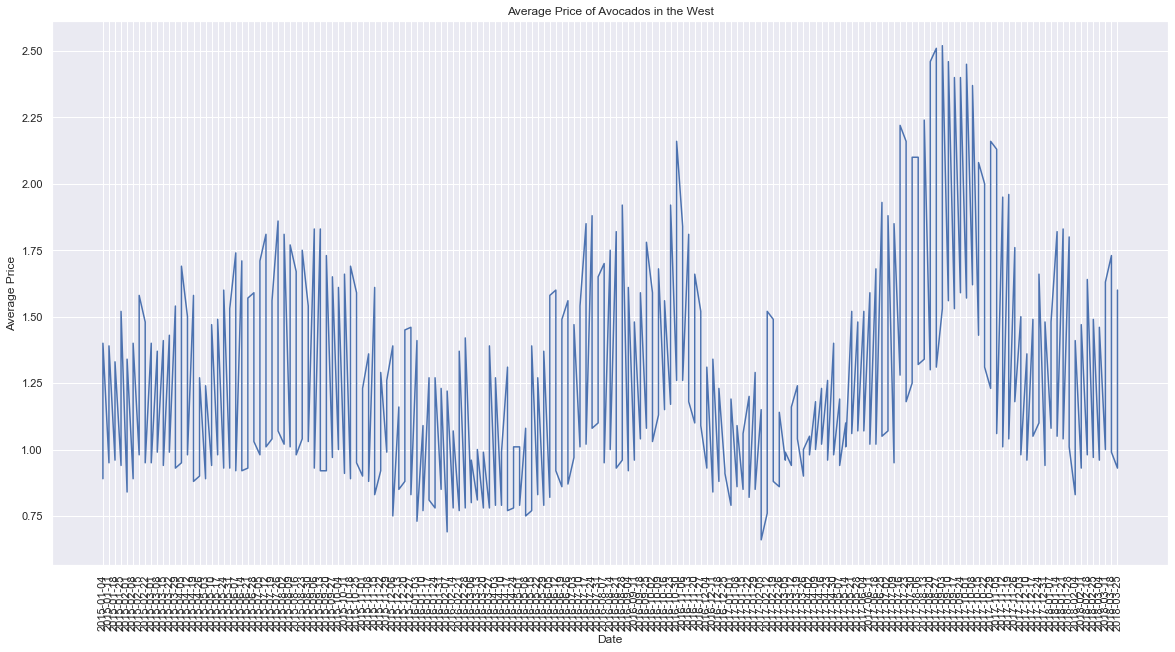

In [28]:
plt.figure(figsize=(20,10))
plt.plot(west['Date'], west['AveragePrice'])
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Average Price')
plt.title('Average Price of Avocados in the West')

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

In [29]:
model = west.rename(columns={'Date':'ds', 'AveragePrice':'y'})

# Pronosticar al futuro un año (365 días)

In [30]:
m = Prophet()
m.fit(model)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

23:42:02 - cmdstanpy - INFO - Chain [1] start processing
23:42:02 - cmdstanpy - INFO - Chain [1] done processing


# Graficar datos históricos y pronosticados

Text(0.5, 0.98, 'Forecast of Avocado Prices in the West')

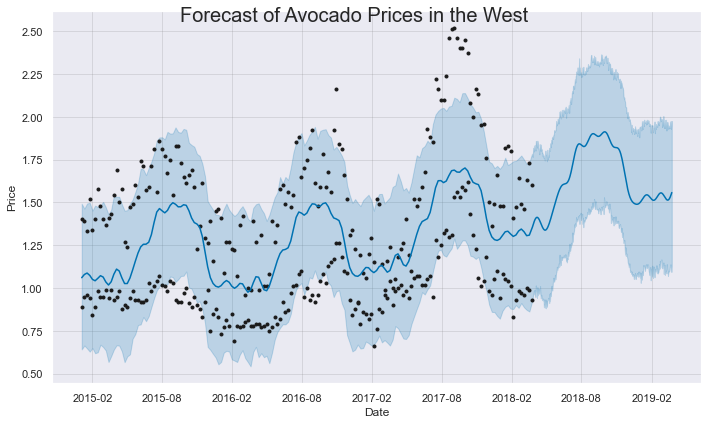

In [31]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')
figure.suptitle('Forecast of Avocado Prices in the West', fontsize=20)

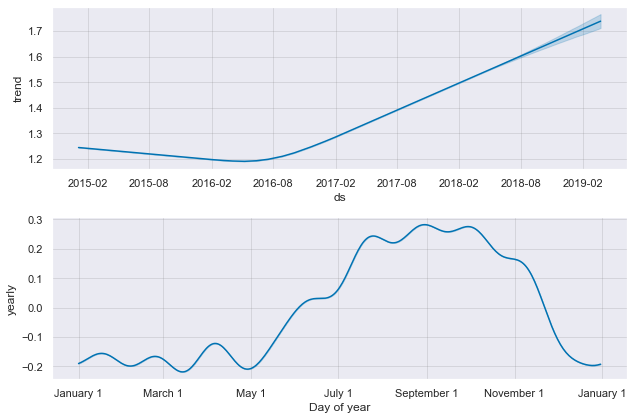

In [32]:
figure2 = m.plot_components(forecast)